## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## MOMENTUM = 0.95, nesterov=True

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 4s 80us/step - loss: 1.4563 - accuracy: 0.4862 - val_loss: 1.7156 - val_accuracy: 0.4239
Epoch 50/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4515 - accuracy: 0.4875 - val_loss: 1.6612 - val_accuracy: 0.4383
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

Epoch 47/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.4131 - accuracy: 0.8502 - val_loss: 2.1274 - val_accuracy: 0.5286
Epoch 48/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.4031 - accuracy: 0.8554 - val_loss: 2.1393 - val_accuracy: 0.5244
Epoch 49/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.3875 - accuracy: 0.8617 - val_loss: 2.2410 - val_accuracy: 0.5267
Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.3708 - accuracy: 0.8653 - val_loss: 2.2576 - val_accuracy: 0.5201
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

50000/50000 [==============================] - 7s 148us/step - loss: 0.9355 - accuracy: 0.6723 - val_loss: 1.3626 - val_accuracy: 0.5344
Epoch 45/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.9252 - accuracy: 0.6747 - val_loss: 1.3621 - val_accuracy: 0.5328
Epoch 46/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9099 - accuracy: 0.6799 - val_loss: 1.4021 - val_accuracy: 0.5269
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.9000 - accuracy: 0.6843 - val_loss: 1.3885 - val_accuracy: 0.5280
Epoch 48/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8878 - accuracy: 0.6873 - val_loss: 1.3692 - val_accuracy: 0.5372
Epoch 49/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.8781 - accuracy: 0.6928 - val_loss: 1.4012 - val_accuracy: 0.5256
Epoch 50/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8646 - accuracy: 0.6953 - val_loss:

50000/50000 [==============================] - 7s 139us/step - loss: 1.5993 - accuracy: 0.4449 - val_loss: 1.6115 - val_accuracy: 0.4360
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5943 - accuracy: 0.4457 - val_loss: 1.6063 - val_accuracy: 0.4372
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5892 - accuracy: 0.4474 - val_loss: 1.6007 - val_accuracy: 0.4429
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5850 - accuracy: 0.4500 - val_loss: 1.5977 - val_accuracy: 0.4432
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5807 - accuracy: 0.4504 - val_loss: 1.5931 - val_accuracy: 0.4434
Epoch 46/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5757 - accuracy: 0.4516 - val_loss: 1.5894 - val_accuracy: 0.4461
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5715 - accuracy: 0.4550 - val_loss:

Epoch 39/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.9754 - accuracy: 0.3107 - val_loss: 1.9753 - val_accuracy: 0.3098
Epoch 40/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9714 - accuracy: 0.3118 - val_loss: 1.9713 - val_accuracy: 0.3112
Epoch 41/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.9675 - accuracy: 0.3137 - val_loss: 1.9675 - val_accuracy: 0.3115
Epoch 42/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.9636 - accuracy: 0.3150 - val_loss: 1.9637 - val_accuracy: 0.3132
Epoch 43/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.9599 - accuracy: 0.3161 - val_loss: 1.9601 - val_accuracy: 0.3131
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9563 - accuracy: 0.3173 - val_loss: 1.9564 - val_accuracy: 0.3167
Epoch 45/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.9528 - accuracy: 0.3193

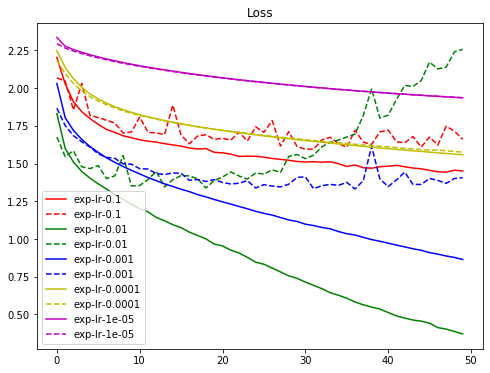

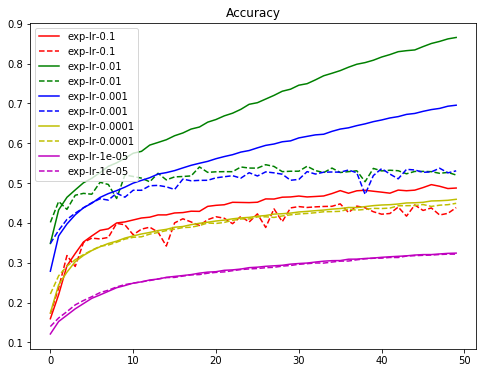

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## MOMENTUM = 0.65, nesterov=True

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.65

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 7s 133us/step - loss: 0.7274 - accuracy: 0.7368 - val_loss: 1.8556 - val_accuracy: 0.4966
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.6942 - accuracy: 0.7484 - val_loss: 2.0163 - val_accuracy: 0.4784
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6866 - accuracy: 0.7491 - val_loss: 1.9778 - val_accuracy: 0.4634
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9403 - accuracy: 0.6707 - val_loss: 1.4376 - val_accuracy: 0.5179
Epoch 47/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.9260 - accuracy: 0.6760 - val_loss: 1.5868 - val_accuracy: 0.4823
Epoch 48/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.9161 - accuracy: 0.6780 - val_loss: 1.3399 - val_accuracy: 0.5384
Epoch 49/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.9079 - accuracy: 0.6832 - val_loss: 1.7868 - val_accuracy: 0.4523
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.8887 - accuracy: 0.6888 - val_loss: 1.4818 - val_accuracy: 0.5139
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4968 - accuracy: 0.4773 - val_loss: 1.5330 - val_accuracy: 0.4592
Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4926 - accuracy: 0.4795 - val_loss: 1.5298 - val_accuracy: 0.4577
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4876 - accuracy: 0.4804 - val_loss: 1.5346 - val_accuracy: 0.4632
Epoch 47/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4825 - accuracy: 0.4821 - val_loss: 1.5272 - val_accuracy: 0.4581
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4783 - accuracy: 0.4823 - val_loss: 1.5153 - val_accuracy: 0.4700
Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4733 - accuracy: 0.4840 - val_loss: 1.5172 - val_accuracy: 0.4636
Epoch 50/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4684 - accuracy: 0.4863

50000/50000 [==============================] - 8s 166us/step - loss: 1.9031 - accuracy: 0.3399 - val_loss: 1.9064 - val_accuracy: 0.3356
Epoch 42/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8995 - accuracy: 0.3408 - val_loss: 1.9029 - val_accuracy: 0.3347
Epoch 43/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8960 - accuracy: 0.3413 - val_loss: 1.8995 - val_accuracy: 0.3386
Epoch 44/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8926 - accuracy: 0.3432 - val_loss: 1.8961 - val_accuracy: 0.3389
Epoch 45/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8893 - accuracy: 0.3435 - val_loss: 1.8931 - val_accuracy: 0.3409
Epoch 46/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8861 - accuracy: 0.3449 - val_loss: 1.8899 - val_accuracy: 0.3411
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8830 - accuracy: 0.3458 - val_loss:

Epoch 39/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1936 - accuracy: 0.2214 - val_loss: 2.1919 - val_accuracy: 0.2215
Epoch 40/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1915 - accuracy: 0.2229 - val_loss: 2.1898 - val_accuracy: 0.2227
Epoch 41/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1894 - accuracy: 0.2243 - val_loss: 2.1878 - val_accuracy: 0.2234
Epoch 42/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.1873 - accuracy: 0.2253 - val_loss: 2.1858 - val_accuracy: 0.2242
Epoch 43/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.1853 - accuracy: 0.2265 - val_loss: 2.1838 - val_accuracy: 0.2255
Epoch 44/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.1833 - accuracy: 0.2274 - val_loss: 2.1818 - val_accuracy: 0.2273
Epoch 45/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1813 - accuracy: 0.22

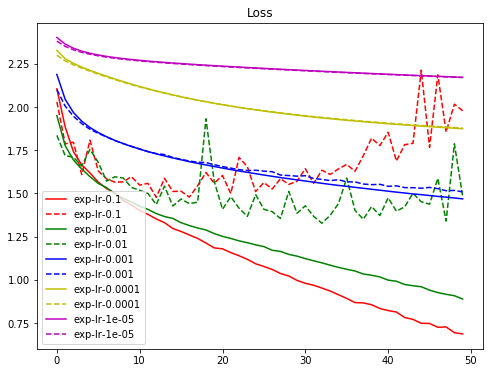

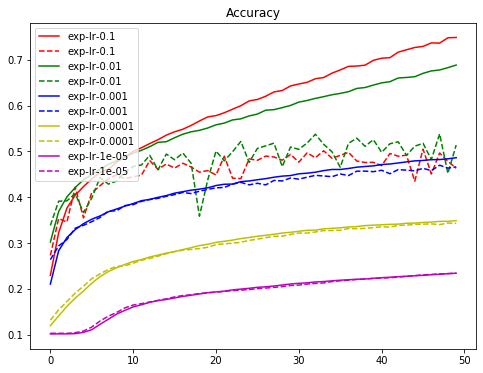

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
## MOMENTUM = 0.65, nesterov=False

In [13]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.65

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 120us/step - loss: 0.6956 - accuracy: 0.7478 - val_loss: 1.8360 - val_accuracy: 0.5002
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6755 - accuracy: 0.7537 - val_loss: 1.9321 - val_accuracy: 0.4991
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.6521 - accuracy: 0.7648 - val_loss: 1.9368 - val_accuracy: 0.5074
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.9290 - accuracy: 0.6709 - val_loss: 1.4049 - val_accuracy: 0.5183
Epoch 47/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.9122 - accuracy: 0.6791 - val_loss: 1.3703 - val_accuracy: 0.5329
Epoch 48/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.8917 - accuracy: 0.6885 - val_loss: 1.3855 - val_accuracy: 0.5318
Epoch 49/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.8892 - accuracy: 0.6857 - val_loss: 1.4174 - val_accuracy: 0.5279
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.8743 - accuracy: 0.6920 - val_loss: 1.4928 - val_accuracy: 0.5008
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

50000/50000 [==============================] - 6s 128us/step - loss: 1.5147 - accuracy: 0.4723 - val_loss: 1.5430 - val_accuracy: 0.4524
Epoch 44/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5094 - accuracy: 0.4740 - val_loss: 1.5348 - val_accuracy: 0.4577
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5036 - accuracy: 0.4769 - val_loss: 1.5338 - val_accuracy: 0.4597
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5000 - accuracy: 0.4770 - val_loss: 1.5309 - val_accuracy: 0.4620
Epoch 47/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4946 - accuracy: 0.4807 - val_loss: 1.5218 - val_accuracy: 0.4616
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4900 - accuracy: 0.4812 - val_loss: 1.5318 - val_accuracy: 0.4535
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4854 - accuracy: 0.4826 - val_loss:

50000/50000 [==============================] - 7s 130us/step - loss: 1.8968 - accuracy: 0.3410 - val_loss: 1.8953 - val_accuracy: 0.3424
Epoch 41/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8931 - accuracy: 0.3438 - val_loss: 1.8916 - val_accuracy: 0.3436
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8894 - accuracy: 0.3443 - val_loss: 1.8883 - val_accuracy: 0.3430
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8859 - accuracy: 0.3463 - val_loss: 1.8850 - val_accuracy: 0.3441
Epoch 44/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8824 - accuracy: 0.3474 - val_loss: 1.8814 - val_accuracy: 0.3469
Epoch 45/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8790 - accuracy: 0.3491 - val_loss: 1.8783 - val_accuracy: 0.3473
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8757 - accuracy: 0.3501 - val_loss:

50000/50000 [==============================] - 6s 129us/step - loss: 2.2034 - accuracy: 0.2019 - val_loss: 2.2036 - val_accuracy: 0.2069
Epoch 38/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2012 - accuracy: 0.2033 - val_loss: 2.2014 - val_accuracy: 0.2084
Epoch 39/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1990 - accuracy: 0.2045 - val_loss: 2.1992 - val_accuracy: 0.2092
Epoch 40/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1967 - accuracy: 0.2057 - val_loss: 2.1970 - val_accuracy: 0.2113
Epoch 41/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1946 - accuracy: 0.2068 - val_loss: 2.1948 - val_accuracy: 0.2125
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1924 - accuracy: 0.2083 - val_loss: 2.1927 - val_accuracy: 0.2129
Epoch 43/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1903 - accuracy: 0.2095 - val_loss:

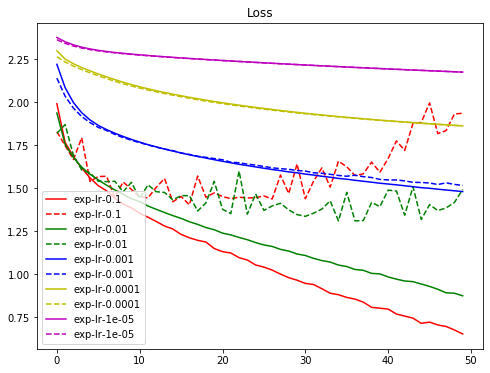

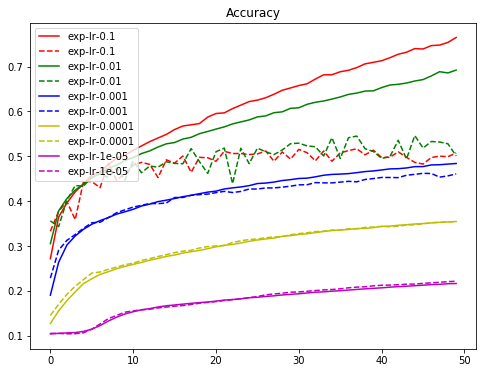

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## MOMENTUM = 0.95, nesterov=False

In [16]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [ ]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.0328 - accuracy: 0.2193 - val_loss: 1.9708 - val_accuracy: 0.2452
Epoch 50/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9684 - accuracy: 0.2340 - val_loss: 1.9856 - val_accuracy: 0.2288
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.6713 - accuracy: 0.7575 - val_loss: 1.6308 - val_accuracy: 0.5296
Epoch 48/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.6417 - accuracy: 0.7695 - val_loss: 1.6829 - val_accuracy: 0.5304
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.6277 - accuracy: 0.7729 - val_loss: 1.6750 - val_accuracy: 0.5352
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.6092 - accuracy: 0.7787 - val_loss: 1.7322 - val_accuracy: 0.5346
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()